In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [2]:
df = pd.read_excel("Volve field dataset.xlsx")


In [3]:
df.head()
for column_name in df.columns:
    print(column_name)

ON_STREAM_HRS
AVG_DOWNHOLE_TEMPERATURE
AVG_ANNULUS_PRESS
AVG_CHOKE_SIZE_P
AVG_WHP_P
AVG_WHT_P
DP_CHOKE_SIZE
BORE_OIL_VOL
BORE_GAS_VOL
AVG_DOWNHOLE_PRESSURE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             15349 non-null  float64
 1   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 2   AVG_ANNULUS_PRESS         7890 non-null   float64
 3   AVG_CHOKE_SIZE_P          8919 non-null   float64
 4   AVG_WHP_P                 9155 non-null   float64
 5   AVG_WHT_P                 9146 non-null   float64
 6   DP_CHOKE_SIZE             15340 non-null  float64
 7   BORE_OIL_VOL              9161 non-null   float64
 8   BORE_GAS_VOL              9161 non-null   float64
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
dtypes: float64(10)
memory usage: 1.2 MB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

ON_STREAM_HRS                285
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
AVG_DOWNHOLE_PRESSURE       6654
dtype: int64


In [6]:
# Drop rows containing zeros
df = df[(df != 0).all(axis=1)]
# # Remove rows with any missing values
df_cleaned = df.dropna()
df_cleaned

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,AVG_DOWNHOLE_PRESSURE
762,7.00000,0.352200,2.885360,3.256548,28.049310,18.194630,18.851470,17.85,2772.47,1.926270
763,24.00000,60.315740,19.464510,8.549131,102.121180,36.967440,72.955190,725.00,108940.11,163.594260
769,5.07514,105.551370,21.550252,2.540804,94.564586,55.958893,66.403770,190.35,29119.73,273.946931
772,15.07486,104.933215,1.652926,6.116182,96.495539,41.019083,68.441106,590.09,88733.42,277.797679
773,24.00000,105.439765,17.308850,9.951288,96.201492,52.455287,67.943750,1066.46,161227.00,273.594368
...,...,...,...,...,...,...,...,...,...,...
8923,24.00000,106.517574,21.318431,31.575767,15.813363,49.020020,1.259761,144.01,23201.35,194.983953
8924,24.00000,106.515586,21.105330,31.540612,15.773242,48.988494,1.198993,145.22,23068.07,194.977634
8925,24.00000,106.521356,21.353661,31.522096,15.701963,50.103416,1.279639,142.74,23059.68,194.317112
8926,24.00000,106.506781,20.629658,31.523457,15.608422,49.841092,1.204128,144.46,23090.47,195.207173


In [7]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

ON_STREAM_HRS               0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
AVG_DOWNHOLE_PRESSURE       0
dtype: int64


In [8]:
df = df_cleaned

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4166 entries, 762 to 8927
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             4166 non-null   float64
 1   AVG_DOWNHOLE_TEMPERATURE  4166 non-null   float64
 2   AVG_ANNULUS_PRESS         4166 non-null   float64
 3   AVG_CHOKE_SIZE_P          4166 non-null   float64
 4   AVG_WHP_P                 4166 non-null   float64
 5   AVG_WHT_P                 4166 non-null   float64
 6   DP_CHOKE_SIZE             4166 non-null   float64
 7   BORE_OIL_VOL              4166 non-null   float64
 8   BORE_GAS_VOL              4166 non-null   float64
 9   AVG_DOWNHOLE_PRESSURE     4166 non-null   float64
dtypes: float64(10)
memory usage: 358.0 KB


In [10]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,AVG_DOWNHOLE_PRESSURE
count,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000
mean,23.176426,104.105784,18.317129,53.508996,46.625716,71.257470,17.833872,1267.456013,185511.783406,241.756029
std,3.227762,4.097660,5.121428,37.138717,20.366290,20.195073,18.779491,1467.662582,208051.335717,25.020767
min,0.250000,0.352200,0.000020,0.600000,1.029739,7.036688,0.583915,0.170000,28.860000,1.926270
25%,24.000000,100.475027,14.382808,12.310157,31.132721,62.851258,2.932432,224.007500,33468.267500,220.369351
50%,24.000000,105.944562,18.879005,50.840645,38.252217,80.044548,9.971860,701.600000,105720.455000,246.946029
75%,24.000000,106.481651,22.065755,100.000000,58.764222,86.986802,26.688448,1332.427500,201676.870000,261.793436
max,25.000000,107.507552,30.019828,100.000000,120.888576,92.071120,106.035140,5888.690000,835981.330000,308.055940


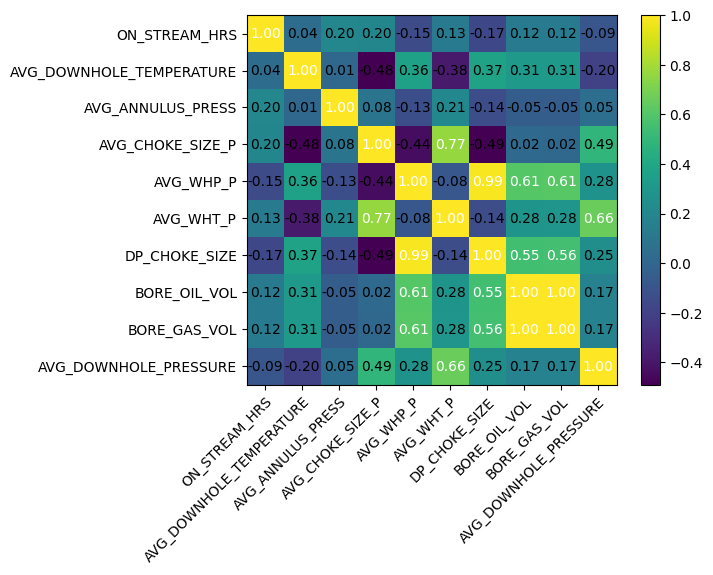

<Figure size 2500x2000 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
cols = df.columns.tolist()
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names = cols, column_names = cols)
# Enlarge the figure size
plt.figure(figsize=(25, 20))
plt.show()

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)

In [14]:
x_train.shape

(3124, 9)

In [15]:
y_train.shape

(3124,)

In [16]:
import numpy as np

# Take the natural logarithm of the features
x_train_log = np.log(x_train)
x_test_log = np.log(x_test)

In [17]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Generate a range of alpha values spanning multiple orders of magnitude
alphas = np.logspace(-3, 3, 7)  # This will generate values from 0.001 to 1000

# Create a pipeline with feature scaling and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lasso', Lasso())  # Lasso regression
])

# Define hyperparameters to tune
param_grid = {'lasso__alpha': alphas}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search to the training data
grid_search.fit(x_train_log, y_train)  # Replace x_train_scaled and y_train with your training data

# Get the best alpha value
best_alpha = grid_search.best_params_['lasso__alpha']

# Print the best alpha value
print("Best alpha:", best_alpha)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e+04, tolerance: 1.578e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.209e+03, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.715e+02, tolerance: 1.578e

Best alpha: 0.1


In [18]:
#fit the model
from sklearn.linear_model import Lasso
lasso_mod = Lasso(alpha=0.1).fit(x_train_log,y_train)

In [19]:
# lasso_mod = Lasso(alpha=0.01, max_iter=10000).fit(x_train_log, y_train)

In [20]:
lasso_mod.coef_

array([  2.03044613,  30.39507044,  -0.33456594,  16.662728  ,
        50.75392338,  38.25917017,   3.93565611, -18.32982729,
        -0.        ])

In [21]:
print("Intercept:", lasso_mod.intercept_)

Intercept: -206.58070093289825


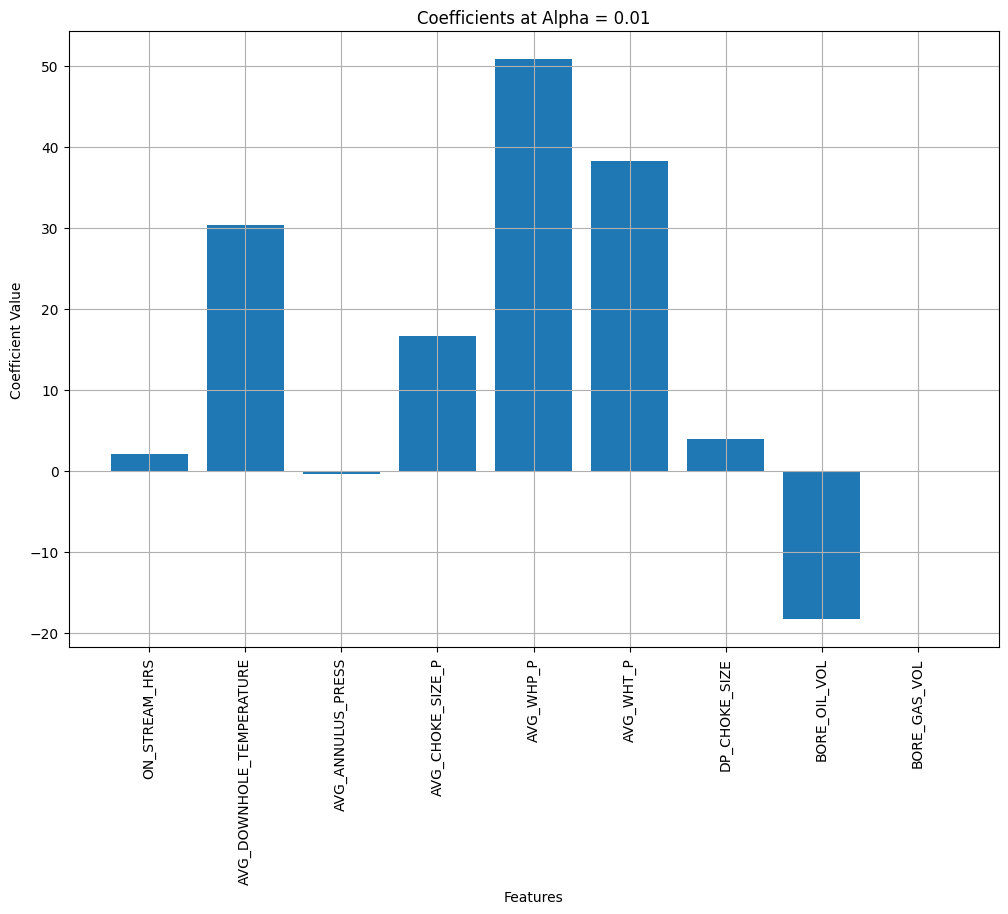

In [22]:
# identifying which of the features contribute to the model
# Get feature names
feature_names = df.columns
coefficients = lasso_mod.coef_

# Create DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names[:-1], 'Coefficient': coefficients})

# Plot coefficients
plt.figure(figsize=(12, 8))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients at Alpha = 0.01')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [23]:
#printing the r-squared on training data
print('lasso regression on training data', lasso_mod.score(x_train_log, y_train)*100)

lasso regression on training data 76.58081637841275


In [24]:
#printing the r-squared on test data
print('lasso regression on test data', lasso_mod.score(x_test_log, y_test)*100)

lasso regression on test data 78.00258393658079


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


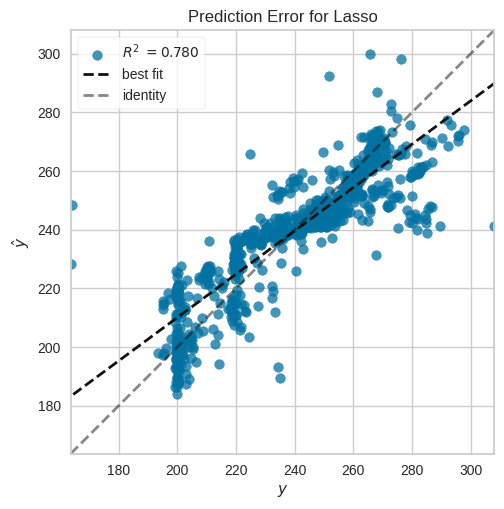

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
#plotting the prediction errors and residuals using yellow brick
!pip install yellowbrick
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lasso_mod)
visualizer.fit(x_train_log, y_train)
visualizer.score(x_test_log,y_test)
visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


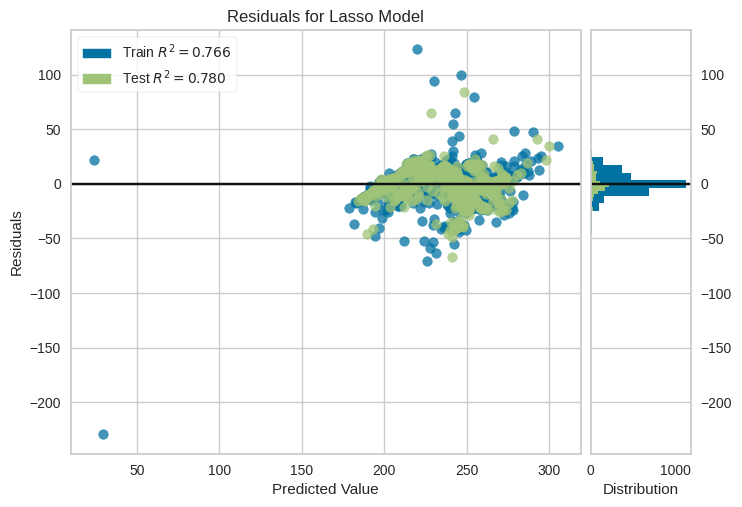

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
#plotting the residuals
visualizer = ResidualsPlot(lasso_mod)
visualizer.fit(x_train_log,y_train)
visualizer.score(x_test_log,y_test)
visualizer.poof()

In [27]:
y_pred =lasso_mod.predict(x_test_log)

In [28]:
# Create a DataFrame to display the predicted values for the test data
result_df = pd.DataFrame({'Predicted Values': y_pred})


# Create a DataFrame to display the predicted and actual values
result_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values of AVG_DOWNHOLE_PRESSURE': y_pred})

# Display the DataFrame
print(result_df.head(15))

      Actual Values  Predicted Values of AVG_DOWNHOLE_PRESSURE
1163     265.812269                                 245.906340
8087     199.714866                                 189.428519
7184     265.382097                                 262.564390
2170     235.708089                                 252.861815
8683     223.130863                                 212.361288
2859     267.022065                                 253.122667
1860     251.343919                                 241.469494
7640     267.210376                                 267.793313
7527     266.157293                                 261.145763
7397     262.291793                                 251.654462
7773     267.212864                                 266.849270
1239     219.749815                                 226.555836
8072     200.341786                                 187.681363
1247     219.458958                                 228.378539
1079     225.209442                                 233

In [29]:
#For the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_pred = lasso_mod.predict(x_test_log)

# Calculate MAE
mae_test = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse_test = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)
#calculate MAPE

mape_test = mean_absolute_percentage_error(y_test,y_pred)
# Print MAE, MSE, and RMSE
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean absolute percentage error: ", mape_test)

Mean Absolute Error (MAE): 8.255949208554767
Mean Squared Error (MSE): 139.6476252955515
Root Mean Squared Error (RMSE): 11.817259635615674
Mean absolute percentage error:  0.034813327678556105


In [30]:
#Using Multiple Linear regression as the Baseline model for comparison with the Lasso regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
import numpy as np

# Initialize the MLR model
mlr_model = LinearRegression()

# Fit the MLR model
mlr_model.fit(x_train_log, y_train)

# Make predictions using the MLR model
y_pred_mlr = mlr_model.predict(x_test_log)

# Calculate Mean Absolute Error (MAE) for MLR
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
#calculate MAPE
mape_mlr = mean_absolute_percentage_error(y_test, y_pred_mlr)


# Print MAE for MLR
print("Mean Absolute Error (MLR):", mae_mlr)
# Print MAPE for MLR
print("Mean absolute percentage error;", mape_mlr )
# Calculate and print Root Mean Squared Error (RMSE) for MLR
rmse_mlr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
print("Root Mean Squared Error (MLR):", rmse_mlr)

print("Mean_squared_error:", (mean_squared_error(y_test, y_pred_mlr)))

# Calculate R-squared
r2_mlr = r2_score(y_test, y_pred_mlr)
print("R-squared (MLR):", r2_mlr)

Mean Absolute Error (MLR): 8.220325296646232
Mean absolute percentage error; 0.03471564233618759
Root Mean Squared Error (MLR): 11.640454425578325
Mean_squared_error: 135.500179233966
R-squared (MLR): 0.7865589326729228


In [31]:
!pip install nbconvert


In [32]:
!jupyter nbconvert --to html Jonath.ipynb

[NbConvertApp] WARNING | pattern 'Jonath.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exec